In [1]:
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
# import cv2

In [2]:
print(sys.path)

['/home/lance/ese680/final_proj', '', '/home/lance/zixuan_lan_ws/devel/lib/python3/dist-packages', '/home/lance/catkin_ws/devel/lib/python3/dist-packages', '/home/lance/catkin_ws/devel/lib/python2.7/dist-packages', '/home/lance/pyckbot/py', '/home/lance/anaconda3/lib/python37.zip', '/home/lance/anaconda3/lib/python3.7', '/home/lance/anaconda3/lib/python3.7/lib-dynload', '/home/lance/anaconda3/lib/python3.7/site-packages', '/home/lance/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/lance/.ipython']


In [3]:
import cv2

In [57]:
img=cv2.imread('columbia_tuned.pgm',0)

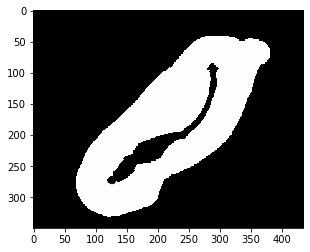

In [58]:
# show img
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(img,cmap='gray')

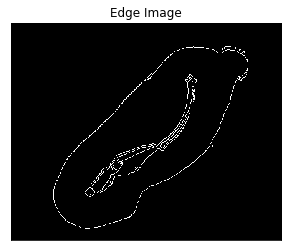

In [161]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

edges = cv2.Canny(img,100,200)

# plt.subplot(121),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.imshow(edges,cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

(Text(0.5, 1.0, 'Eroded Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

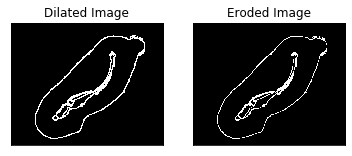

In [162]:
# kernel = np.ones((1,20), np.uint8)  # note this is a horizontal kernel
kernel = np.ones((3,3), np.uint8) 
d_im = cv2.dilate(edges, kernel,iterations=1)
kernel = np.ones((2,2), np.uint8) 
e_im = cv2.erode(d_im, kernel, iterations=1) 
edges = cv2.Canny(e_im,100,200)

plt.subplot(121),plt.imshow(d_im,cmap = 'gray')
plt.title('Dilated Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(e_im,cmap = 'gray')
plt.title('Eroded Image'), plt.xticks([]), plt.yticks([])

# plt.imshow(d_im,cmap='gray')
# plt.title('dilated Image'), plt.xticks([]), plt.yticks([])

# plt.show()

# plt.imshow(d_im,cmap='gray')

(Text(0.5, 1.0, 'dilated Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

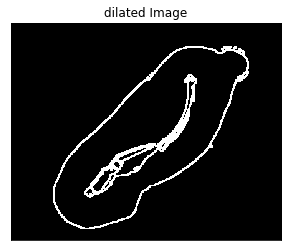

In [153]:
plt.imshow(d_im,cmap='gray')
plt.title('dilated Image'), plt.xticks([]), plt.yticks([])

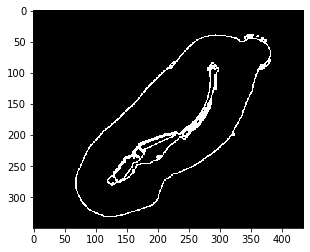

In [163]:
plt.imshow(e_im,cmap='gray')
# plt.title('Eroded Image'), plt.xticks([]), plt.yticks([])

'4.1.1'

In [7]:
# # find contours
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt
# %matplotlib inline
# def thresh_callback(thresh):
#     edges = cv2.Canny(blur,thresh,thresh*2)
#     drawing = np.zeros(img.shape,np.uint8)     # Image to draw the contours
#     contours,hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     for cnt in contours:
#         color = np.random.randint(0,255,(3)).tolist()  # Select a random color
#         cv2.drawContours(drawing,[cnt],0,color,2)
#         cv2.imshow('output',drawing)
#     cv2.imshow('input',img)
#     return contours

# img = cv2.imread('columbia_tuned.pgm')
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray,(5,5),0)

# # cv2.namedWindow('input',cv2.WINDOW_AUTOSIZE)

# thresh = 100
# max_thresh = 255

# # cv2.createTrackbar('canny thresh:','input',thresh,max_thresh,thresh_callback)

# contours=thresh_callback(thresh)

# if cv2.waitKey(0) == 27:
#     cv2.destroyAllWindows()

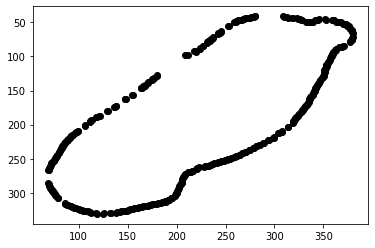

In [108]:
import numpy as np
import cv2 as cv
# from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import pyplot as plt
%matplotlib inline

im = cv.imread('columbia_tuned.pgm')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(im, contours, -1, (0,0,255), 3)

out_cnt=np.asarray(contours[0])
out_cnt=np.reshape(out_cnt,(-1,2))
out_cnt=np.vstack((out_cnt,out_cnt[0,:]))
in_cnt=np.asarray(contours[1])
in_cnt=np.reshape(in_cnt,(-1,2))
in_cnt=np.vstack((in_cnt,in_cnt[0,:]))


x,y=out_cnt[:,0],out_cnt[:,1]
plt.plot(x,y, 'ok',label='poly')
# plt.axes.Axes.invert_yaxis
ax = plt.gca()
ax.invert_yaxis()
plt.show()


# t = np.arange(x.shape[0], dtype=float)
# t /= t[-1]
# nt = np.linspace(0, 1, 100)
# x1 = scipy.interpolate.spline(t, x, nt)
# y1 = scipy.interpolate.spline(t, y, nt)
# plt.plot(x1, y1, label='range_spline')

# t = np.zeros(x.shape)
# t[1:] = np.sqrt((x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2)
# t = np.cumsum(t)
# t /= t[-1]
# x2 = scipy.interpolate.spline(t, x, nt)
# y2 = scipy.interpolate.spline(t, y, nt)
# plt.plot(x2, y2, label='dist_spline')

# plt.legend(loc='best')
# plt.show()

# # for i in range(len(contours)):
# for i in [0,1]:
#     cv.drawContours(im, contours, i, (0,0,255), 3)
#     cv2.imshow('im',im)
#     if cv2.waitKey(0) == 27:
#         cv2.destroyAllWindows()
        


(1000, 2)
(1000, 2)
205.0 673 554


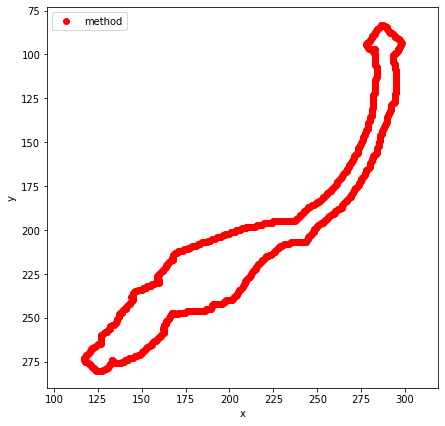

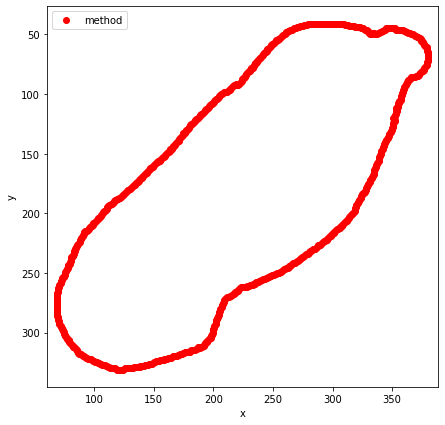

In [304]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pdb
# referecen: https://stackoverflow.com/questions/52014197/how-to-interpolate-a-2d-curve-in-python
# interpolate
# fit spline
def interp_line(points,n):
    
    # Linear length along the line:
    distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
    distance = np.insert(distance, 0, 0)/distance[-1]
    alpha = np.linspace(0, 1, n)
    interpolated_points = {}
#     method='cubic'
#     method='quadratic'
    method='slinear'
    interpolator =  interp1d(distance, points, kind=method, axis=0)
    interpolated_points['method'] = interpolator(alpha)
    plt.figure(figsize=(7,7))
    for method_name, curve in interpolated_points.items():
        plt.plot(*curve.T, 'or', label=method_name);
    print(curve.shape)
#     plt.plot(*points.T, 'ok', label='original points');
    plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');
    ax = plt.gca()
    ax.invert_yaxis()
    return curve
    

def fit_spline(points,n):

    distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
    distance = np.insert(distance, 0, 0)/distance[-1]

    # Build a list of the spline function, one for each dimension:
    splines = [UnivariateSpline(distance, coords, k=3, s=.2) for coords in points.T]

    # Computed the spline for the asked distances:
#     alpha = np.linspace(0, 1, n)
    alpha=np.arange(0,n,1)
    points_fitted = np.vstack( spl(alpha) for spl in splines ).T
    # Graph:
    plt.plot(*points.T, 'ok', label='original points');
    plt.plot(*points_fitted.T, '-r', label='fitted spline k=3, s=.2');
    plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');
    ax = plt.gca()
    ax.invert_yaxis()
    return points_fitted

n=1000
points_in = interp_line(in_cnt,n)
points_out = interp_line(out_cnt,n)
points_in=np.flip(points_in,0)


intersect_pts,ids_in,ids_out=np.intersect1d(points_in[:,0], points_out[:,0],return_indices=True)
for i in range(len(intersect_pts)):
    id_in=ids_in[i]
    id_out=ids_out[i]
    intersect_pt=intersect_pts[i]
    if np.abs(points_in[id_in,1]-points_out[id_out,1])<50:
        break

# id_in,id_out=ids_in[0],ids_out[0]
# intersect_pt=intersect_pts[0]

print(intersect_pt,id_in,id_out)
id_in,id_out=int(id_in),int(id_out)
new_in=np.vstack((points_in[id_in:,:],points_in[:id_in,:]))
new_out=np.vstack((points_out[id_out:,:],points_out[:id_out,:]))
weight=0.4
raceline=weight*new_in + (1-weight)*new_out


In [315]:
cv.arcLength(list(out_cnt),True)

TypeError: Expected Ptr<cv::UMat> for argument '%s'

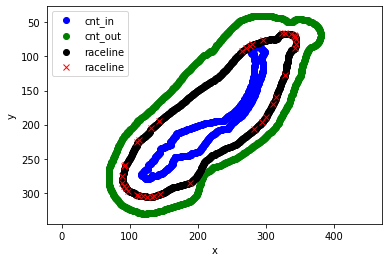

In [327]:
# # points_in=np.flip(points_in,0)
# intersect_pt,id_in,id_out=np.intersect1d(points_in[:,0], points_out[:,0],return_indices=True)
# print(intersect_pt,id_in,id_out)
# # print(points_in[points_in[:,0]==280,:])
# id_in,id_out=int(id_in),int(id_out)
# k=5
# print(points_in[id_in:id_in+k,:])
# print(points_out[id_out:id_out+k,:])

# new_in=np.vstack((points_in[id_in:,:],points_in[:id_in,:]))
# new_out=np.vstack((points_out[id_out:,:],points_in[:id_out,:]))
# raceline=1/2*(new_in + new_out)

# k=5
# # plt.plot(*points_in[89:89+5,:].T, 'ob',label='cnt_in')
# # plt.plot(*points_out[0:5,:].T, 'og',label='cnt_out')a=100


raceline_hull=cv.convexHull(np.reshape(raceline,(-1,1,2)).astype(int))
raceline_hull=np.reshape(raceline_hull,(-1,2))
# plot all lines
a=0
b=n

plt.plot(*new_in[a:b,:].T, 'ob',label='cnt_in')
plt.plot(*new_out[a:b,:].T, 'og',label='cnt_out')
plt.plot(*raceline[a:b,:].T, 'ok',label='raceline')
# plt.plot(*raceline_hull[a:b,:].T, 'xr',label='raceline')

# plt.plot(*new_in.T, 'ob',label='cnt_in')
# plt.plot(*new_out.T, 'og',label='cnt_out')
# plt.plot(*raceline.T, 'ok',label='raceline')
plt.axis('equal'); plt.legend(); plt.xlabel('x'); plt.ylabel('y');
ax = plt.gca()
ax.invert_yaxis()

In [328]:
# a=np.reshape(raceline,(-1,1,2)).astype(int)
# b=cv.convexHull(a)
# print(b)

In [20]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline
im = cv.imread('columbia_tuned_handdraw.pgm')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(im, contours, 1, (0,0,255), 3)

# out_cnt=contours[0]
# in_cnt=contours=[1]

# # for i in range(len(contours)):
for i in [0]:
    cv.drawContours(im, contours, i, (0,0,255), 3)
    cv2.imshow('im',im)
    if cv2.waitKey(0) == 27:
        cv2.destroyAllWindows()

In [167]:
points=out_cnt
# n=1000
distance = np.cumsum( np.sqrt(np.sum( np.diff(points, axis=0)**2, axis=1 )) )
distance = np.insert(distance, 0, 0)/distance[-1]
alpha = np.linspace(0, 1, n)
interpolated_points = {}
method='slinear'
interpolator =  interp1d(distance, points, kind=method, axis=0)
interpolated_points['method'] = interpolator(alpha)

ValueError: A value in x_new is above the interpolation range.

In [163]:
points=out_cnt
print(out_cnt.shape)

(446, 2)
